In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
customer_df=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
customer_df.shape

(9134, 24)

In [6]:
#Fisrt we replace the blank spaces in the column titles with underscores
customer_df.columns = customer_df.columns.str.replace(' ', '_')

In [7]:
#We check that the underscores are there
customer_df.head(5)

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
#We transform the titles from upper and lower cases to full lower case
customer_df.columns = customer_df.columns.str.lower()

In [9]:
#Checking the changes
customer_df.head(5)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
#Transform the column effective_to_date to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')

In [11]:
#We want only the numeric columns, for that we exclude all columns that are 'object'.
customer_df.select_dtypes(exclude = ['object'])

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147
1,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247
3,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,2011-02-10,71941,73,18,89,0,2,198.234764
9130,3096.511217,2011-02-12,21604,79,14,28,0,1,379.200000
9131,8163.890428,2011-02-06,0,85,9,37,3,2,790.784983
9132,7524.442436,2011-02-03,21941,96,34,3,0,3,691.200000


In [12]:
#We create a new dataframe with only the numerical variables
numerical_df=customer_df.select_dtypes(exclude = ['object'])

In [13]:
#Let's check the new dataframe
numerical_df.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147
1,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247
3,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879


In [14]:
#The new dataframe has the target column (Total Claim Amount), we are dropping this column from the new dataframe.
column = ['total_claim_amount']
numerical_df.drop(column, inplace=True, axis=1)

In [15]:
#Checking the reformulated dataframe
numerical_df.head()
#the target has been removed

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,2011-02-24,56274,69,32,5,0,1
1,6979.535903,2011-01-31,0,94,13,42,0,8
2,12887.431650,2011-02-19,48767,108,18,38,0,2
3,7645.861827,2011-01-20,0,106,18,65,0,7
4,2813.692575,2011-02-03,43836,73,12,44,0,1


In [16]:
#Continuous variables are identify as float64 and discrete variables as int64
discrete_df=numerical_df.select_dtypes(include=['int64'])
continuous_df=numerical_df.select_dtypes(include=['float64'])

In [17]:
#Let's check the new discrete dataframe
discrete_df.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1


In [18]:
#Let's check the new continuous dataframe
continuous_df.head()

,customer_lifetime_value
0,2763.519279
1,6979.535903
2,12887.431650
3,7645.861827
4,2813.692575


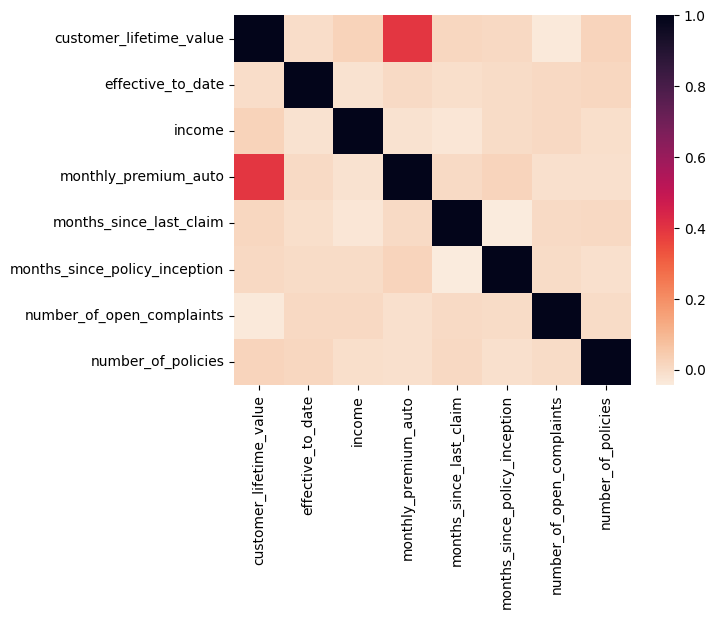

In [19]:
 #We analyze the correlation matrix for the numerical values
sns_plot = sns.heatmap(numerical_df.corr(), cmap="rocket_r")
#We see high correlation between customer_lifetime_value and monthly_premium_auto

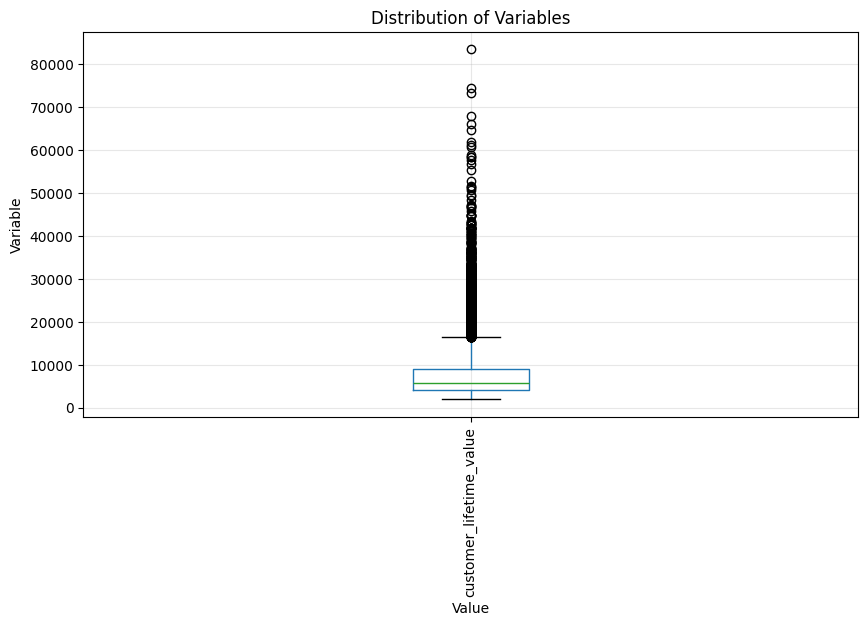

In [20]:
#Let's see the continuous variable alone
continuous_df.boxplot(vert=True, showfliers=True,figsize=(10,5))
plt.xlabel('Value')
plt.ylabel('Variable')
plt.title('Distribution of Variables')
plt.grid(alpha=0.3)
plt.xticks(rotation=90)
plt.show()
#We could argue that above 50000 the density of the observation is lower and it becomes more scatter, this tendency is even more acentuated above 60000.

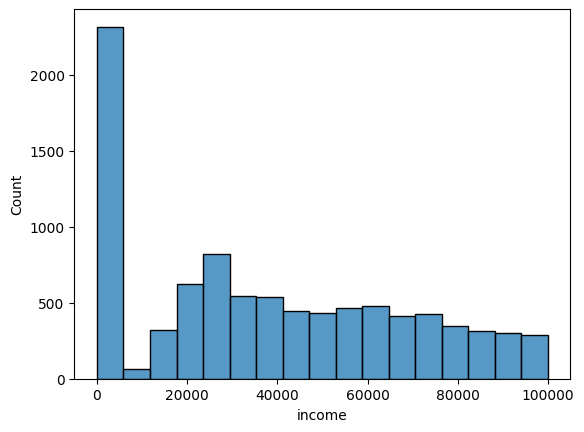

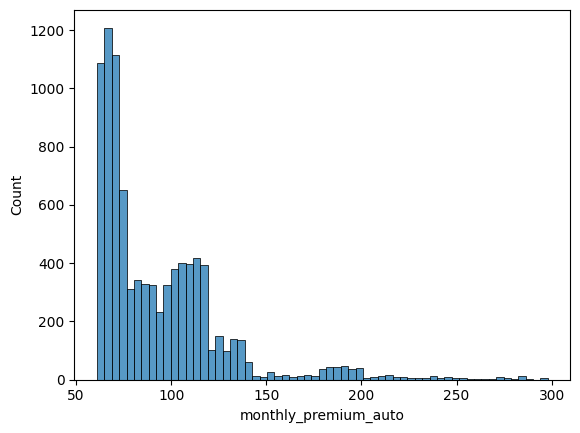

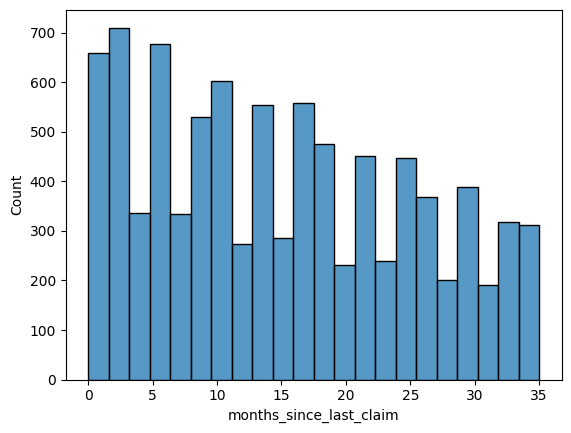

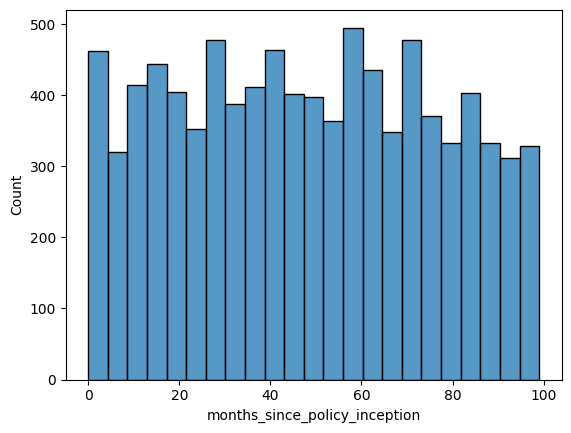

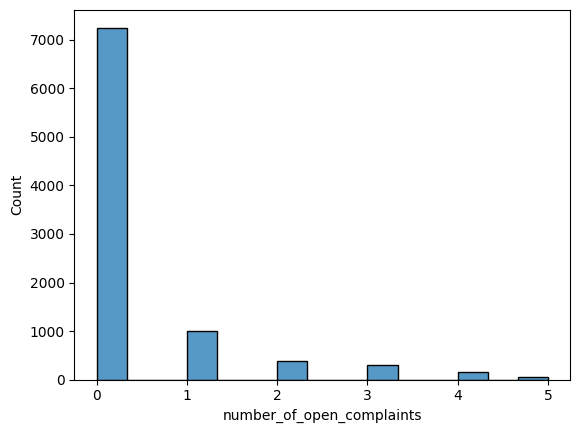

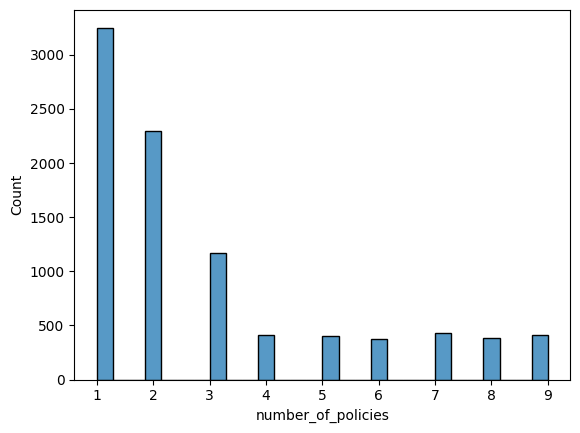

In [21]:
#We graph the discrete numerical columns 
for column in discrete_df.columns:
    plt.figure()            
    sns.histplot(discrete_df[column])

In [22]:
#Check for null values
numerical_df.isnull().values.any()
#There are no null values in the numerical dataframe

False

In [23]:
#Save to a csv file 
numerical_df.to_csv('file_name.csv') 

In [24]:
##Next we are going to be working with categorical data
categorical_df=customer_df.select_dtypes(include = ['object'])

In [25]:
#Let's check the new dataframe
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [26]:
#Check for null values
categorical_df.isnull().values.any()
#There are no null values in the categorical dataframe

False

In [27]:
#Check all unique values of columns
categorical_df.nunique

<bound method DataFrame.nunique of      customer       state response  coverage education employmentstatus  \
0     BU79786  Washington       No     Basic  Bachelor         Employed   
1     QZ44356     Arizona       No  Extended  Bachelor       Unemployed   
2     AI49188      Nevada       No   Premium  Bachelor         Employed   
3     WW63253  California       No     Basic  Bachelor       Unemployed   
4     HB64268  Washington       No     Basic  Bachelor         Employed   
...       ...         ...      ...       ...       ...              ...   
9129  LA72316  California       No     Basic  Bachelor         Employed   
9130  PK87824  California      Yes  Extended   College         Employed   
9131  TD14365  California       No  Extended  Bachelor       Unemployed   
9132  UP19263  California       No  Extended   College         Employed   
9133  Y167826  California       No  Extended   College       Unemployed   

     gender location_code marital_status     policy_type        

In [28]:
categorical_df.dtypes
#The dtypes are consistent with categorical values types

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [29]:
#Does any column contain alpha and numeric data?
count = 0
def alphanum():
    columns = categorical_df.columns.tolist()
    for x in columns:
        if x.isalnum():
         count = count + 1
    return count
print(count)

# Answer: No , there are no columns with alphanumeric data

0


In [30]:
#Compare policy_type and policy.
#What information is contained in these columns. Can you identify what is important?
#Check number of unique values in each column, can they be combined in any way to ease encoding? 
#Comment your thoughts and make those changes.

In [31]:
categorical_df['policy_type'].info

<bound method Series.info of 0       Corporate Auto
1        Personal Auto
2        Personal Auto
3       Corporate Auto
4        Personal Auto
             ...      
9129     Personal Auto
9130    Corporate Auto
9131    Corporate Auto
9132     Personal Auto
9133    Corporate Auto
Name: policy_type, Length: 9134, dtype: object>

In [32]:
categorical_df['policy'].info

<bound method Series.info of 0       Corporate L3
1        Personal L3
2        Personal L3
3       Corporate L2
4        Personal L1
            ...     
9129     Personal L1
9130    Corporate L3
9131    Corporate L2
9132     Personal L2
9133    Corporate L3
Name: policy, Length: 9134, dtype: object>

In [33]:
#The columns policy_type and policy are quite similar, it would be advisable to only retain one.
#The column policy has sub-levels indicated by the "L", this would add more complexity to the encoding process.
#It would be better to drop the 'policy' column
categorical_df=categorical_df.drop(columns='policy')

In [34]:
#Let's check that we have drop the correct column
categorical_df.head(5)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


In [35]:
#Save the cleaned catagorical dataframe as categorical.csv 
categorical_df.to_csv('categorical.csv', index=False)